**Notes**
- .gz: compressed CSVs with no header, so I will need to provide column names from kddcup.names

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

# Data Exploration

In [2]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [4]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [5]:
y.describe()

,income
count,48842
unique,4
top,<=50K
freq,24720


In [6]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

'>50K' and '>50K.' is 1, '<=50K' and '<=50K.' is 0. 

In [7]:
for idx, value in y['income'].items():
    if value in ['<=50K', '<=50K.']:
        y.at[idx, 'income'] = 0
    else:
        y.at[idx, 'income'] = 1

In [8]:
y['income'].unique()

array([0, 1], dtype=object)

In [9]:
y['income'] = y['income'].astype(int)

/var/folders/83/qx33zxpd4cjb39h49x9vvynr0000gn/T/ipykernel_26916/3755289315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].astype(int)


In [10]:
y['income'].unique()

array([0, 1])

In [11]:
y.describe()

,income
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  48842 non-null  int64
dtypes: int64(1)
memory usage: 381.7 KB


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [14]:
num_rows_with_null = X.isnull().any(axis=1).sum()
print(num_rows_with_null)

1221


In [15]:
(X == '?').sum().sum() #sum per column, total across all columns 

np.int64(4262)

In [16]:
import pandas as pd

X = X.replace('?', pd.NA)

num_rows_with_null = X.isna().any(axis=1).sum()
print(num_rows_with_null)

3620


In [17]:
X['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', <NA>, 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

Before we drop the missing rows, we want to see if there are alternative methods that could be better. First we will investigate if the missingness seems random or not. 

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [19]:
#lets see % missingness in each column, random missingness should have the same % per column
X.isnull().mean().sort_values(ascending=False)

occupation        0.057512
workclass         0.057307
native-country    0.017546
age               0.000000
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
dtype: float64

In [20]:
#this ues Chi-Squared test of indepdendence on a contingency table, 
#tells you whether two categorical variables are statistically independent
from scipy.stats import chi2_contingency

for col in ["occupation", "workclass", "native-country"]:
    #builds a contingency table (frequency counts)
    contingency = pd.crosstab(X[col].isnull(), y.squeeze())
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{col}: p-value={p:.4f}")

#if p < 0.05, missingness is statistically associated with the target 
#if p > 0.05, there's no strong evidence missingness depends on the target

occupation: p-value=0.0000
workclass: p-value=0.0000
native-country: p-value=0.2436


To deal with this, we will create a "missing" bucket for the embeddings since this statistical significance tells us that hte missingness is informative to the model. 

In [21]:
for column in X.columns:
    if X[column].dtype == 'object':
        print(f"{column}: {len(X[column].unique())}")



workclass: 10
education: 16
marital-status: 7
occupation: 16
relationship: 6
race: 5
sex: 2
native-country: 43


Checking for duplicate rows

In [22]:
num_duplicates = X.duplicated().sum()
print(num_duplicates)

57


Checking how many times the same features map to different targets

In [23]:
#temp_df = X + y = features + target
temp_df = X.copy()
temp_df['target'] = y

#list(X.columns) - gives a Python list of all feature column names
#temp_df.groupby(list(X.columns)) - groups rows of temp_df by all their feature values
#["target"].nunique() - inside each group, look only at the target column and count 
    # how many unique target values there are
#.reset_index() - by default groupby makes the grouping columns part of the index, not normal columns
    # so reset_index() moves them abck into regular columns
conflicts = (
    temp_df.groupby(list(X.columns))["target"].nunique().reset_index()
)

conflicts = conflicts[conflicts['target'] > 1]

print("Number of conflicting feature sets:", len(conflicts))

Number of conflicting feature sets: 5


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


## Options for Encoding Categorical Variables
1. One-Hot Encoding
   - Pros: no information loss
   - Cons: expldoes feature size, leads to sparse data
2. Label Encoding
   - How it works: Assign each category an integer label
   - Pros: keeps dimensionality low
   - Cons: NN may interpret numbers as ordinal when in reality they have no mathematical relationship
3. Target Encoding / Mean Encoding
   - How it works: Replaces each category with a numerical statistic, which could be the most common category
   - Pros: compact
   - Cons: loss of information
4. Embedding Layers
   - How it works: each category is mapped to a dense vector of learned weights

Dropping rows for SMOTENC

In [89]:
X = X.dropna()
y = y.loc[X.index]
print("X", X.shape)
print('y', y.shape)

X (45222, 14)
y (45222, 1)


# Preprocessing
- We already handled missing data, and categorical data will be handled when we setup the model since there will be an embedding layer. 

In [90]:
from sklearn.model_selection import train_test_split
import numpy as np

cat_cols = [c for c in X.columns if X[c].dtype == 'object']
num_cols = X.select_dtypes(include=[np.number]).columns

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.2,
    random_state=42,
    stratify=y_train_full
)


#stratification to y to make sure distribution of classes is the same in train and validaiton. 



                    

## SMOTENC

In [102]:
import numpy as np
import pandas as pd

X_tr = X_train.copy()
y_tr = y_train.copy()

cats_lookup = {} #storing category lists to invert codes later
for column in cat_cols:
    cat = pd.Categorical(X_tr[column])
    cats_lookup[column] = cat.categories
    X_tr[column] = cat.codes #integer codes

all_cols = list(X_tr.columns)
cat_idx = [all_cols.index(c) for c in cat_cols]

In [107]:
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(
    categorical_features=cat_idx,
    sampling_strategy="auto",
    k_neighbors=5,
    random_state=42
)
X_tr_res, y_tr_res = sm.fit_resample(X_tr.values, np.asarray(y_tr).ravel())

In [108]:
X_train_res = pd.DataFrame(X_tr_res, columns=all_cols)
y_train_res = pd.Series(y_tr_res, index=range(len(y_tr_res)))

for column in cat_cols:
    codes = X_train_res[column].astype(int).to_numpy()
    X_train_res[column] = pd.Series(cats_lookup[column].take(codes), index=X_train_res.index).astype("object")

In [109]:
print("Before:", y_train.value_counts().to_dict())
print("After :", y_train_res.value_counts().to_dict())

Before: {(0,): 21768, (1,): 7173}
After : {1: 21768, 0: 21768}


In [111]:
X_train = X_train_res
y_train = y_train_res

print(X_train.shape, y_train.shape)

(43536, 14) (43536,)


### Converting categorical columns to integer IDS

Embedding layers expect integer indices, so the categories must be mapped to numbers with 0 reserved for UNK (unknown/unseen categories)

In [112]:
#first we build the mappings from the training dataset only
cat_maps = {}

for column in cat_cols:
    updated_column = X_train[column].astype("object").fillna("__MISSING__")
    categories = updated_column.unique()
    mapping = {"__UNK__": 0, "__MISSING__": 1}
    next_id = 2
    for v in categories:
        if v in mapping: 
            continue
        mapping[v] = next_id
        next_id += 1
    cat_maps[column] = mapping

print(cat_maps)

for c in cat_cols:
    print(len(cat_maps[c]))
    

{'workclass': {'__UNK__': 0, '__MISSING__': 1, 'Private': 2, 'State-gov': 3, 'Self-emp-not-inc': 4, 'Federal-gov': 5, 'Local-gov': 6, 'Self-emp-inc': 7, 'Without-pay': 8}, 'education': {'__UNK__': 0, '__MISSING__': 1, 'Bachelors': 2, 'HS-grad': 3, 'Masters': 4, 'Some-college': 5, '7th-8th': 6, 'Prof-school': 7, '11th': 8, '10th': 9, 'Assoc-voc': 10, '5th-6th': 11, '12th': 12, 'Assoc-acdm': 13, '9th': 14, 'Doctorate': 15, '1st-4th': 16, 'Preschool': 17}, 'marital-status': {'__UNK__': 0, '__MISSING__': 1, 'Married-civ-spouse': 2, 'Never-married': 3, 'Divorced': 4, 'Separated': 5, 'Widowed': 6, 'Married-spouse-absent': 7, 'Married-AF-spouse': 8}, 'occupation': {'__UNK__': 0, '__MISSING__': 1, 'Exec-managerial': 2, 'Adm-clerical': 3, 'Prof-specialty': 4, 'Sales': 5, 'Farming-fishing': 6, 'Machine-op-inspct': 7, 'Transport-moving': 8, 'Craft-repair': 9, 'Tech-support': 10, 'Other-service': 11, 'Protective-serv': 12, 'Priv-house-serv': 13, 'Handlers-cleaners': 14, 'Armed-Forces': 15}, 'relat

In [113]:
def map_categories(column, mapping):
    column = column.astype("object").fillna("__MISSING__")
    return column.map(mapping).fillna(mapping["__UNK__"]).astype("int64")

# I removed missing columns from X already, but here
# map(mapping) will return NaN if it encounters a category not seen in cat_maps
# that is, not seen in training but seen in the validation set
# so, I put fillna(0) to put those unseen cateogires into the unk bucket


#the map_categories function only works on one column at a time,
#so I put a lambda function so it applies map_categories to all columns in cat_cols

train_categories = X_train[cat_cols].apply(lambda column: map_categories(column, cat_maps[column.name]))
val_categories = X_val[cat_cols].apply(lambda column: map_categories(column, cat_maps[column.name]))

print("Train:\n", train_categories)
print("\nVal:\n", val_categories)

Train:
        workclass  education  marital-status  occupation  relationship  race  \
0              2          2               2           2             2     2   
1              3          3               3           3             3     3   
2              2          4               2           4             2     2   
3              4          5               2           5             2     2   
4              2          5               3           3             4     2   
...          ...        ...             ...         ...           ...   ...   
43531          2          2               2           2             2     2   
43532          2          3               2           2             2     2   
43533          2          4               2          10             2     2   
43534          2          3               2           9             2     2   
43535          2         13               2           9             2     2   

       sex  native-country  
0        2    

### Scaling the numeric columns 

In [114]:
import numpy as np
from sklearn.preprocessing import StandardScaler

#standard scaler transforms integers into real numbers
#PyTorch layers expect inputs of type torch.float32
#It is float32 instead of float64 to use less memory, therefore the training process is faster

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_cols]).astype("float32")
X_val_scaled = scaler.transform(X_val[num_cols]).astype("float32")

### Building categorical ID matrices
This step is about converting the categorical columns into the shape that that the embedding layers expect, which is (batch_size, num_cat_cols)

In [115]:
X_train_categories = train_categories.to_numpy(dtype="int64")
X_val_categories = val_categories.to_numpy(dtype="int64")

print(X_train_categories.shape) #(num_rows, num_cat_cols)
print(X_train_categories[:3]) #each row = one training example
                              #each column = one encoded ID for a categorical feature

(43536, 8)
[[2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 2]
 [2 4 2 4 2 2 2 3]]


### Make y float32
- We will be using nn.BCEWithLogitsLoss
- The model will output a float32 logit
- The loss compares that float32 logit against the target tensor (y), and if y is int, PyTorch will throw a dtype mismatch error 

In [116]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [117]:
y_train_array = y_train.astype("float32").to_numpy()
y_val_array = y_val.astype("float32").to_numpy()

In [118]:
print(type(y_train_array))

<class 'numpy.ndarray'>


### The Embedding Layer
- Mathematically: a lookup table (a matrix of learnable weights)
- Shape: (num_categories, embedding_dim); the rows are categories (0, 1, 2, etc.) and the columns are the latent features for each category. So, each categorical column will get its own embedding layer.
- It expects a tensor of integer IDs (torch.int64 aka LongTensor) of shape (batch_size, num_cat_cols). Each row is a sample, each column is the category (integer IDs)
- For each categorical column it outputs an embedding vector as float32. For multiple categorical columns, their embeddings will be contatenated.
- The embedding vectors themselves are learned during training


<br>
In short: column --> embedding vector 
<br>
The next step will be figuring out how many categories each column has, then picking embedding dimensions for each. 

### Vocab sizes 
The cleanest, stable vocab size is just the mapping length, or the toal number of unique integer IDs that can appear in a given column

In [119]:
vocab_sizes = [len(cat_maps[c]) for c in cat_cols]

#next, we have a function that computes the embedding dimension
#in a way that balances model expressiveness with efficiency

def pick_emb_dim(vocab_size):
    return min(50, max(4, int(round(vocab_size**0.25 * 8))))

#Next we compute the embedding dimensions for each column
emb_dims = [(vocab_size, pick_emb_dim(vocab_size)) for vocab_size in vocab_sizes]

print("vocab_sizes", vocab_sizes)
print("emb_dims", emb_dims)

vocab_sizes [9, 18, 9, 16, 8, 7, 4, 43]
emb_dims [(9, 14), (18, 16), (9, 14), (16, 16), (8, 13), (7, 13), (4, 11), (43, 20)]


# Modeling
This part of the project is where the PyTorch philosphy shines.
- Nothing is hidden, and I define how data is stored, accessed, batched, and shuffled.

For this, PyTorch gives two pieces:
1. Dataset: how to get a single sample, and we can neatly package each batch as (x_cats, x_nums, y)
2. DataLoader: how to turn that Dataset into batches with shuffling, batching, multiprocessing, moving to GPU, etc. 

## Dataset and DataLoader 

In [120]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class TabularDS(Dataset):
    def __init__(self, X_cats, X_nums, y):
        self.X_cats = X_cats
        self.X_nums = X_nums
        self.y = y.reshape(-1, 1) #forces column vector (N,1)

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, i):
        return (
            torch.tensor(self.X_cats[i], dtype=torch.long),
            torch.tensor(self.X_nums[i], dtype=torch.float32),
            torch.tensor(self.y[i], dtype=torch.float32),
        )
train_dataset = TabularDS(X_train_categories, X_train_scaled, y_train_array)
val_dataset = TabularDS(X_val_categories, X_val_scaled, y_val_array)

#smaller batch size for training batches helps the optimizer see more gradient noise,
#improving generalization
#in validation, we aren't updating any weights so higher batch size means faster evaluation
#in addition, we shuffle the training set so the model doesn't overfit to the order in the data
#we set shuffling to false for validation loader as it provides no benefit 

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1024, shuffle=False)

## Model

In [121]:
import torch.nn as nn

class CatEmbMLP(nn.Module):
    #hidden=(128, 64) means first linear layer is 128 units and second linear layer is 64
    def __init__(self, emb_dims, n_num, hidden = (256, 128, 64), p=0):
        super().__init__()
        #for each categorical column, build one embedding table
        #v = vocab size (number of categories)
        #d = embedding dimension (chosen earlier)
        self.embs = nn.ModuleList([nn.Embedding(v, d) for (v, d) in emb_dims])
        self.emb_drop = nn.Dropout(p)

        #emb_dims is of shape (vocab_sizei, emb_dimi)
        #the next line refers to the total embedding output size
        #n_num is the amount of numerical columns
        in_dim = sum(d for _, d in emb_dims) + n_num
        layers = []
        for h in hidden:
            layers += [
                nn.Linear(in_dim, h), 
                nn.BatchNorm1d(h),
                nn.LeakyReLU(), 
                nn.Dropout(p)]
            in_dim = h #reset the input dimensions 
        layers += [nn.Linear(in_dim, 1)] #binary logit
        self.mlp = nn.Sequential(*layers)

    #x_cat: categorical input tensor
        #shape: (batch_size, n_cat_cols)
        #dtype: torch.int64 (LongTensor)
    #x_num: numeric input tensor
        #shape: (batch_size, n_num_cols)
        #dtype: torch.float32
    def forward(self, x_cat, x_num):
        #x_cat[:, i] = all IDs for column i in the batch --> shape (batch_size,)
        #emb(x_cat[:, i]) = look up each IDs embedding vector --> shape (batch_size, emb_dim_i)
        #emb_list collects these embeddings in a list 
        emb_list = [emb(x_cat[:, i]) for i, emb in enumerate(self.embs)]
        #join the embedding vectors side by side --> (batch_size, sum_of_all_emb_dims)
        x = torch.cat(emb_list, dim=1)
        #applying dropout for regularization, preventing overfitting to rare cetegories
        x = self.emb_drop(x)
        #join with numeric features, shape (batch_size, sum_emb_dims + n_num) as defined in __init__
        x = torch.cat([x, x_num], dim=1)
        #forward pass through the mlp
        return self.mlp(x)

#seeing if we can take advantage of Apple Silicon GPU 
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
n_num = X_train_scaled.shape[1]
model = CatEmbMLP(emb_dims, n_num, hidden=(128, 64), p=0.1).to(device)

## Training Loop

### Improvements. 

**Run 1**
Epoch 001 | train 0.3054 | val 0.3064 | acc 0.861 | auc 0.916 | lr 2.0e-04
Epoch 002 | train 0.3034 | val 0.3067 | acc 0.861 | auc 0.916 | lr 2.0e-04
Epoch 003 | train 0.3048 | val 0.3070 | acc 0.860 | auc 0.915 | lr 2.0e-04
Epoch 004 | train 0.3039 | val 0.3071 | acc 0.860 | auc 0.915 | lr 2.0e-04
Epoch 005 | train 0.3039 | val 0.3073 | acc 0.860 | auc 0.915 | lr 1.0e-04
Epoch 006 | train 0.3034 | val 0.3073 | acc 0.860 | auc 0.915 | lr 1.0e-04
Epoch 007 | train 0.3038 | val 0.3073 | acc 0.860 | auc 0.915 | lr 1.0e-04
Epoch 008 | train 0.3027 | val 0.3074 | acc 0.859 | auc 0.915 | lr 1.0e-04
Epoch 009 | train 0.3022 | val 0.3074 | acc 0.860 | auc 0.915 | lr 5.0e-05
Epoch 010 | train 0.3024 | val 0.3074 | acc 0.860 | auc 0.915 | lr 5.0e-05
Epoch 011 | train 0.3028 | val 0.3075 | acc 0.859 | auc 0.915 | lr 5.0e-05
Early stopping at epoch 11 (best val loss: 0.3064)
Loaded best model (val loss = 0.3064 )

- it seems that train accuracy ~= val accuracy, but since they increase very little over epochs it seems like the model isn't learning very much 
- To compare, we could run XGBoost.

**Run 2**
Here, I will try variance depth and width of the neural network while implementing regularization 

In [122]:
import torch
from torch import nn
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

#I had problems using mps so switched to cpu. 
device = torch.device("cpu")

model = model.to(device)

# Loss, Optimizer, Scheduler 
criterion = nn.BCEWithLogitsLoss() #binary cross entropy
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-4, weight_decay=1e-4)

#if a metric (validation loss below) doesn't improve after 3 epochs, reduce learning rate
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=3, min_lr=1e-5
)

# One training epoch
def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train() #in PyTorch there is train and eval modes 
    total_loss, total_n = 0.0, 0
    for x_cat, x_num, yb in loader:
        #PyTorch tensors must live on the same device as the model to interact
        #non_blocking isn't really relevant unless using GPU
        x_cat = x_cat.to(device, non_blocking=True)
        x_num = x_num.to(device, non_blocking=True)
        yb    = yb.to(device, non_blocking=True) #shape (batch_size, 1)

        logits = model(x_cat, x_num) #calls the forward function of the model           
        loss = criterion(logits, yb) #computing loss

        #clears old gradients from previous step (PyTorch accumulates gradients)
        optimizer.zero_grad(set_to_none=True)
        #PyTorch computes gradient of loss w respect to each parameter by applying
        #the chain rule through the computation graph
        #every parameter at the end has a .grad tensor attached
        loss.backward()
        #rescales the gradients if their norm exceeds 1.0 preventing exploding gradients
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        #optimizer updates the parameters using the stored .grad rules
        #for adamw, this means it does adaptive learning rate calculation + weight decay
        # + correction before applying the update
        optimizer.step()

        batch_size = yb.size(0) #gives number of rows 
        total_loss += loss.item() * batch_size #sum of losses per batch
        total_n += batch_size
    return total_loss / total_n #epoch wide mean loss 

# Validation pass 
@torch.no_grad()
def evaluate(model, loader, criterion, device):
    model.eval() #put the model in eval mode 
    total_loss, total_n = 0.0, 0
    all_probs, all_targets = [], []

    for x_cat, x_num, yb in loader:
        x_cat = x_cat.to(device, non_blocking=True)
        x_num = x_num.to(device, non_blocking=True)
        yb    = yb.to(device, non_blocking=True)

        logits = model(x_cat, x_num)
        loss = criterion(logits, yb)

        bs = yb.size(0)
        total_loss += loss.item() * bs
        total_n += bs

        #converts to probabilities, moves off gpu if using it, and converts to numpy array
        #for scikit-learn metrics 
        probs = torch.sigmoid(logits).squeeze(1).cpu().numpy()
        targets = yb.squeeze(1).cpu().numpy() #makes it (batch_size,)
        all_probs.append(probs)
        all_targets.append(targets)

    import numpy as np
    all_probs   = np.concatenate(all_probs, axis=0).reshape(-1)     # 1-D
    all_targets = np.concatenate(all_targets, axis=0).reshape(-1)   # 1-D

    # (optional) mask out any non-finite values, just in case
    m = np.isfinite(all_probs) & np.isfinite(all_targets)
    all_probs, all_targets = all_probs[m], all_targets[m]

    # preds as integers (0/1)
    preds = (all_probs >= 0.5).astype(np.int32)

    from sklearn.metrics import accuracy_score, roc_auc_score
    acc = accuracy_score(all_targets, preds)

    # auc only if both classes present
    if np.unique(all_targets).size > 1:
        auc = roc_auc_score(all_targets, all_probs)
    else:
        auc = float("nan")

    return (total_loss / total_n), acc, auc

# Training loop with early stopping 
EPOCHS    = 200            
PATIENCE  = 10             
MIN_DELTA = 1e-4        

best_val = float("inf")
patience_ctr = 0
best_state = None

for epoch in range(1, EPOCHS + 1):
    tr_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    va_loss, va_acc, va_auc = evaluate(model, val_loader, criterion, device)

    #step scheduler on val loss
    scheduler.step(va_loss)

    print(f"Epoch {epoch:03d} | "
          f"train loss {tr_loss:.4f} | val loss {va_loss:.4f} | acc {va_acc:.3f} | auc {va_auc:.3f} | "
          f"lr {optimizer.param_groups[0]['lr']:.1e}")

    # Early stopping
    if va_loss < best_val - MIN_DELTA:
        best_val = va_loss
        best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        patience_ctr = 0
    else:
        patience_ctr += 1
        if patience_ctr >= PATIENCE:
            print(f"Early stopping at epoch {epoch} (best val loss: {best_val:.4f})")
            break

# restoring best weights 
if best_state is not None:
    model.load_state_dict(best_state)
    model.to(device)
    print("Loaded best model (val loss =", f"{best_val:.4f}", ")")

Epoch 001 | train loss 0.4716 | val loss 0.4337 | acc 0.774 | auc 0.870 | lr 2.0e-04
Epoch 002 | train loss 0.3680 | val loss 0.3918 | acc 0.806 | auc 0.885 | lr 2.0e-04
Epoch 003 | train loss 0.3450 | val loss 0.3760 | acc 0.820 | auc 0.892 | lr 2.0e-04
Epoch 004 | train loss 0.3346 | val loss 0.3818 | acc 0.818 | auc 0.895 | lr 2.0e-04
Epoch 005 | train loss 0.3285 | val loss 0.3797 | acc 0.821 | auc 0.897 | lr 2.0e-04
Epoch 006 | train loss 0.3230 | val loss 0.3748 | acc 0.825 | auc 0.899 | lr 2.0e-04
Epoch 007 | train loss 0.3186 | val loss 0.3691 | acc 0.829 | auc 0.901 | lr 2.0e-04
Epoch 008 | train loss 0.3153 | val loss 0.3597 | acc 0.830 | auc 0.904 | lr 2.0e-04
Epoch 009 | train loss 0.3101 | val loss 0.3776 | acc 0.822 | auc 0.903 | lr 2.0e-04
Epoch 010 | train loss 0.3067 | val loss 0.3683 | acc 0.826 | auc 0.906 | lr 2.0e-04
Epoch 011 | train loss 0.3044 | val loss 0.3597 | acc 0.831 | auc 0.906 | lr 2.0e-04
Epoch 012 | train loss 0.3028 | val loss 0.3624 | acc 0.830 | auc

## XGBoost Comparison

In [123]:
import xgboost as xgb
from xgboost.callback import EarlyStopping
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score

X_train_xgb = X_train.copy()
X_val_xgb = X_val.copy()

for categorical in cat_cols:
    X_train_xgb[categorical] = X_train_xgb[categorical].astype("category")
    X_val_xgb[categorical] = pd.Categorical(X_val_xgb[categorical], categories=X_train_xgb[categorical].cat.categories)

#Building DMatrices with native categorical support
dtrain = xgb.DMatrix(X_train_xgb, label=y_train, enable_categorical=True)
dval   = xgb.DMatrix(X_val_xgb,   label=y_val,   enable_categorical=True)

#Params 
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",    
    "max_depth": 6,
    "eta": 0.03,              
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "lambda": 1.0,            
    "alpha": 0.0,              
    "tree_method": "hist",
    "verbosity": 0,
    "seed": 42,
}

#Train with early stopping on validation
evals = [(dval, "val")]
bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=2000,
    evals=evals,
    early_stopping_rounds=50,   
    verbose_eval=False,
)

#Evaluate
probs = bst.predict(dval)   # probabilities for positive class
preds = (probs >= 0.5).astype(int)

auc = roc_auc_score(y_val, probs)
acc = accuracy_score(y_val, preds)

print(f"AUC: {auc:.3f}  ACC: {acc:.3f}  Best trees: {bst.best_iteration}")

AUC: 0.924  ACC: 0.863  Best trees: 554


# Fine Tuning

In [124]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from sklearn.metrics import accuracy_score, roc_auc_score

def make_loaders(batch_size_train, batch_size_val=None):
    if batch_size_val is None:
        batch_size_val = max(1024, batch_size_train * 2)
    train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True,  num_workers=0, pin_memory=False)
    val_loader   = DataLoader(val_dataset,   batch_size=batch_size_val,   shuffle=False, num_workers=0, pin_memory=False)
    return train_loader, val_loader

def train_one_epoch_opt(model, loader, optimizer, criterion, device, clip_norm=1.0, label_smoothing=0.0):
    model.train()
    total, n = 0.0, 0
    for x_cat, x_num, yb in loader:
        x_cat = x_cat.to(device); x_num = x_num.to(device); yb = yb.to(device)
        if label_smoothing > 0:
            yb = yb * (1.0 - label_smoothing) + 0.5 * label_smoothing
        logits = model(x_cat, x_num)
        loss = criterion(logits, yb)
        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip_norm)
        optimizer.step()
        bs = yb.size(0); total += loss.item() * bs; n += bs
    return total / n

@torch.no_grad()
def eval_metrics(model, loader, criterion, device, threshold=0.5):
    model.eval()
    total, n = 0.0, 0
    all_probs, all_targets = [], []
    for x_cat, x_num, yb in loader:
        x_cat = x_cat.to(device); x_num = x_num.to(device); yb = yb.to(device)
        logits = model(x_cat, x_num)
        loss = criterion(logits, yb)
        bs = yb.size(0); total += loss.item() * bs; n += bs
        probs = torch.sigmoid(logits).squeeze(1).cpu().numpy()
        targets = yb.squeeze(1).cpu().numpy()
        all_probs.append(probs); all_targets.append(targets)
    loss = total / n
    all_probs = np.concatenate(all_probs)
    all_targets = np.concatenate(all_targets)
    preds = (all_probs >= threshold).astype(np.int32)
    acc = accuracy_score(all_targets, preds)
    auc = roc_auc_score(all_targets, all_probs) if np.unique(all_targets).size > 1 else float("nan")
    return loss, acc, auc

def build_model_from_trial(trial, emb_dims_base, n_num):
    dim_scale = trial.suggest_float("emb_dim_scale", 0.75, 1.25)
    emb_dims = []
    for (v, d) in emb_dims_base:
        d2 = int(max(4, min(50, round(d * dim_scale))))
        emb_dims.append((v, d2))
    n_layers = trial.suggest_int("n_layers", 2, 6)
    width0 = trial.suggest_categorical("width0", [128, 256, 512])
    widths = [width0]
    for i in range(1, n_layers):
        widths.append(trial.suggest_categorical(f"width{i}", [64, 128, 256, 512]))
    act_name = trial.suggest_categorical("activation", ["ReLU", "LeakyReLU", "GELU"])
    leaky_slope = trial.suggest_float("leaky_slope", 0.01, 0.2) if act_name == "LeakyReLU" else 0.01
    use_bn = trial.suggest_categorical("use_bn", [False, True])
    use_residual = trial.suggest_categorical("use_residuals", [False, True])
    p_mlp = trial.suggest_float("dropout_mlp", 0.0, 0.5)
    p_emb = trial.suggest_float("dropout_emb", 0.0, 0.3)
    model = CatEmbMLPOpt(emb_dims=emb_dims, n_num=n_num, hidden=tuple(widths),
                         p_mlp=p_mlp, p_emb=p_emb, use_bn=use_bn,
                         act_name=act_name, leaky_slope=leaky_slope,
                         use_residuals=use_residual).to("cpu")
    return model

def make_optimizer_from_trial(trial, model):
    opt_name = trial.suggest_categorical("optimizer", ["AdamW", "Adam", "RMSprop"])
    lr = trial.suggest_float("lr", 1e-4, 3e-3, log=True)
    wd_mlp = trial.suggest_float("weight_decay_mlp", 1e-6, 5e-4, log=True)
    wd_emb = trial.suggest_float("weight_decay_emb", 1e-7, 1e-4, log=True)
    beta2 = trial.suggest_float("adam_beta2", 0.95, 0.999)
    eps = trial.suggest_float("adam_eps", 1e-8, 1e-6, log=True)
    emb_params, mlp_params = [], []
    for name, p in model.named_parameters():
        if not p.requires_grad: continue
        (emb_params if name.startswith("embs.") else mlp_params).append(p)
    if opt_name == "AdamW":
        optimizer = torch.optim.AdamW([{"params": emb_params, "weight_decay": wd_emb},
                                       {"params": mlp_params, "weight_decay": wd_mlp}],
                                       lr=lr, betas=(0.9, beta2), eps=eps)
    elif opt_name == "Adam":
        optimizer = torch.optim.Adam([{"params": emb_params, "weight_decay": wd_emb},
                                      {"params": mlp_params, "weight_decay": wd_mlp}],
                                      lr=lr, betas=(0.9, beta2), eps=eps)
    else:
        optimizer = torch.optim.RMSprop([{"params": emb_params, "weight_decay": wd_emb},
                                         {"params": mlp_params, "weight_decay": wd_mlp}],
                                         lr=lr, alpha=0.99, eps=eps)
    return optimizer

def make_scheduler_from_trial(trial, optimizer):
    factor = trial.suggest_float("lr_factor", 0.3, 0.7)
    patience = trial.suggest_int("lr_patience", 2, 6)
    return torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=factor, patience=patience, min_lr=1e-5)

def objective(trial):
    batch_size = trial.suggest_categorical("batch_size", [256, 512, 1024])
    train_loader, val_loader = make_loaders(batch_size)
    model = build_model_from_trial(trial, emb_dims, n_num)
    optimizer = make_optimizer_from_trial(trial, model)
    criterion = nn.BCEWithLogitsLoss()
    scheduler = make_scheduler_from_trial(trial, optimizer)
    clip_norm = trial.suggest_float("clip_norm", 0.5, 2.0)
    label_smoothing = trial.suggest_float("label_smoothing", 0.0, 0.1)

    best_val = float("inf")
    best_acc, best_auc = 0.0, 0.0
    EPOCHS = 25
    for epoch in range(1, EPOCHS + 1):
        _ = train_one_epoch_opt(model, train_loader, optimizer, criterion, device="cpu",
                                clip_norm=clip_norm, label_smoothing=label_smoothing)
        va_loss, va_acc, va_auc = eval_metrics(model, val_loader, criterion, device="cpu")
        scheduler.step(va_loss)
        trial.report(va_loss, step=epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()
        if va_loss < best_val:
            best_val, best_acc, best_auc = va_loss, va_acc, va_auc

    trial.set_user_attr("best_val_loss", float(best_val))
    trial.set_user_attr("best_acc", float(best_acc))
    trial.set_user_attr("best_auc", float(best_auc))
    return best_val

study = optuna.create_study(direction="minimize", sampler=TPESampler(seed=42), pruner=MedianPruner(n_startup_trials=5, n_warmup_steps=5))
study.optimize(objective, n_trials=20, show_progress_bar=True)

bt = study.best_trial
print("Best value (val loss):", study.best_value)
print("Best params:", bt.params)
print("Best trial metrics: acc =", bt.user_attrs.get("best_acc"), "auc =", bt.user_attrs.get("best_auc"))

[I 2025-08-21 18:21:18,100] A new study created in memory with name: no-name-430670de-798a-48bc-99f6-32632d3d5555


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-08-21 18:21:35,008] Trial 0 finished with value: 0.3391857347216904 and parameters: {'batch_size': 512, 'emb_dim_scale': 1.0493292420985183, 'n_layers': 2, 'width0': 512, 'width1': 512, 'activation': 'ReLU', 'use_bn': True, 'use_residuals': False, 'dropout_mlp': 0.14561457009902096, 'dropout_emb': 0.18355586841671384, 'optimizer': 'RMSprop', 'lr': 0.000471705203762518, 'weight_decay_mlp': 0.00013157287601765622, 'weight_decay_emb': 3.972110727381914e-07, 'adam_beta2': 0.975197487482267, 'adam_eps': 1.530485212183145e-07, 'lr_factor': 0.3185801650879991, 'lr_patience': 5, 'clip_norm': 0.7557861855309373, 'label_smoothing': 0.006505159298527952}. Best is trial 0 with value: 0.3391857347216904.
[I 2025-08-21 18:21:46,242] Trial 1 finished with value: 0.3750989629360376 and parameters: {'batch_size': 512, 'emb_dim_scale': 0.9023068845866853, 'n_layers': 2, 'width0': 128, 'width1': 256, 'activation': 'ReLU', 'use_bn': False, 'use_residuals': False, 'dropout_mlp': 0.46974947078209456

# Error Analysis

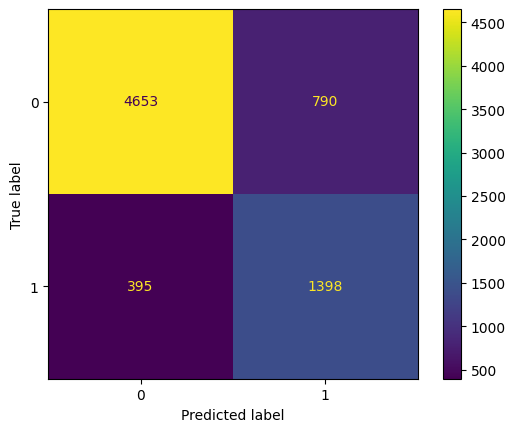

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

probs = torch.sigmoid(model(torch.tensor(X_val_categories, dtype=torch.long),
                            torch.tensor(X_val_scaled, dtype=torch.float32))).detach().numpy().squeeze()
preds = (probs >= 0.5).astype(int)

cm = confusion_matrix(y_val, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
                      

# Reflection

This project went really well in terms of building a full end-to-end pipeline. I was able to set up preprocessing, a custom Dataset and DataLoader, the model, the loss and optimizer, a training loop with early stopping and a learning rate scheduler, and then track metrics properly. Along the way, I developed a much clearer mental model of key PyTorch concepts like logits vs. probabilities, why BCEWithLogitsLoss is preferred, the role of .train() and .eval(), device transfers, batch sizing, and how to aggregate batch metrics. I also handled categorical embeddings correctly, with per-column vocabularies and UNK handling, and built some debugging intuition by catching NaNs during initialization and tracing them back to Apple GPU issues. On top of that, I established a strong baseline by running XGBoost and comparing it to the neural network.

What didn’t go so smoothly was that the validation loss plateaued at around 0.307, regardless of scheduler tweaks or learning rate changes. This turned out not to be a problem with optimization but more a sign of architectural capacity limits in the MLP. Using Apple’s MPS backend also caused NaN issues, which forced me back to CPU training for stability. I also leaned a little too quickly on Optuna, when in hindsight the flat validation curve indicated that I should have tried architectural changes or regularization adjustments first.

The main lessons I’m taking away are that preprocessing must be done carefully to avoid leakage, embeddings help compress sparse categorical data into useful representations, and schedulers should always monitor validation performance, not just training. I also learned it’s often better to slightly over-parameterize a network and regularize it than to under-parameterize and cap performance. XGBoost slightly outperformed the neural network here, which is expected in tabular settings because trees are so good at capturing threshold-like interactions that MLPs miss without more advanced architectures.

If I were to run this again, I would try a larger MLP with batch normalization and lighter dropout, experiment with more dynamic learning rate schedules like OneCycle, and consider using pos_weight in the loss if the classes are imbalanced. I’d also look at engineered interaction features to see if the neural net can learn from what boosts XGBoost. For a bigger leap, I’d try transformer-style tabular models like FT-Transformer and compare them against XGBoost on a larger dataset. Overall, the biggest win is that I now have a clean, reusable training loop, a dataset pipeline, a hyperparameter tuning scaffold, and a strong baseline comparison — all of which I can carry into my next project.
